In [1]:
#
# Copyright (C) 2019 https://github.com/ahagmann
#
# This program is free software: you can redistribute it and/or modify
# it under the terms of the GNU General Public License as published by
# the Free Software Foundation, either version 3 of the License, or
# (at your option) any later version.
#
# This program is distributed in the hope that it will be useful,
# but WITHOUT ANY WARRANTY; without even the implied warranty of
# MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.  See the
# GNU General Public License for more details.
#
# You should have received a copy of the GNU General Public License
# along with this program. If not, see <http://www.gnu.org/licenses/>.
#

In [2]:
%matplotlib inline

import source_synchronous_timing

In [3]:
# nominal target values
setup = 1.5
hold = 0.5
period = 10

In [4]:
# margins
source_setup_margin = 1.2
source_hold_margin = 2

sink_setup_margin = -0.5
sink_hold_margin = -1

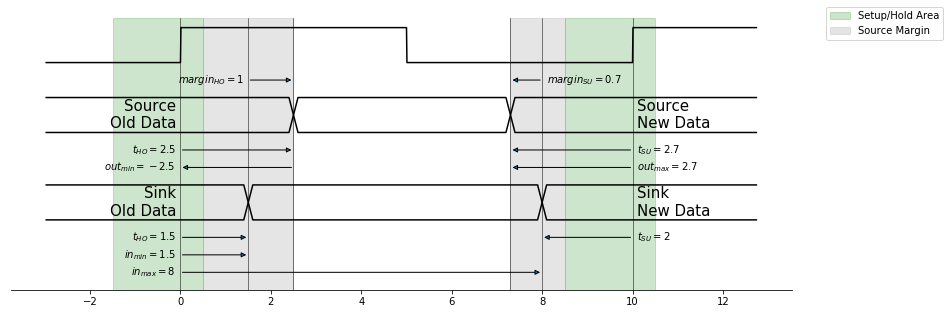

In [5]:
sst = source_synchronous_timing.Timing(period, setup, hold, source_setup_margin, source_hold_margin, sink_setup_margin, sink_hold_margin)

sst.plot()

In [6]:
sst.print_source_constraints()

# output delay min: -2.5
# output delay max: 2.7
set t_SU 1.5
set t_HO 0.5
set t_SU_margin 1.2
set t_HO_margin 2
set t_SU_value [expr t_SU + t_SU_margin]
set t_HO_value [expr t_HO + t_HO_margin]
set_output_delay -clock <CLK_OUT> -min [get_ports <DATA>] [expr -$t_HO_value]
set_output_delay -clock <CLK_OUT> -max -add_delay [get_ports <DATA>] $t_SU_value


In [7]:
sst.print_sink_constraints()

# input delay min: 1.5
# input delay max: 8
set t_SU 1.5
set t_HO 0.5
set period 10
set t_SU_margin -0.5
set t_HO_margin -1
set t_SU_value [expr t_SU - t_SU_margin]
set t_HO_value [expr t_HO - t_HO_margin]
set_input_delay -clock <CLK> -min [get_ports <DATA>] $t_HO_value
set_input_delay -clock <CLK> -max -add_delay [get_ports <DATA>] [expr $period - $t_SU_value]
